In [64]:
#Data import and check
import pandas as pd
reviewdata = pd.read_csv('train.csv')
reviewdata.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [65]:
reviewdata.shape

(38932, 5)

In [66]:
reviewdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [67]:
reviewdata.describe().transpose()

,count,unique,top,freq
User_ID,38932,38932,id25044,1
Description,38932,38932,I recently stayed at the Milford Plaza for - n...,1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


In [68]:
reviewdata.isna().sum()

User_ID         0
Description     0
Browser_Used    0
Device_Used     0
Is_Response     0
dtype: int64

<AxesSubplot:xlabel='Is_Response', ylabel='count'>

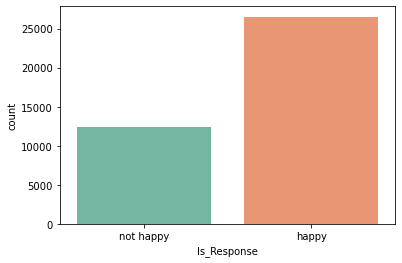

In [69]:
import seaborn as sns
sns.countplot(x = 'Is_Response', data = reviewdata, palette='Set2')

In [70]:
#Removing unnecessary columns
reviewdata.drop(columns= ['User_ID', 'Browser_Used', 'Device_Used'], inplace= True)

In [71]:
#Data cleaning
import re
import string

def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned1 = lambda x: text_clean_1(x)

In [72]:
reviewdata['cleaned_description1'] = pd.DataFrame(reviewdata['Description'].apply(cleaned1))
reviewdata.head()

,Description,Is_Response,cleaned_description1
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...


In [73]:
def text_clean_2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaned2 = lambda x: text_clean_2(x)

In [74]:
reviewdata['cleaned_description2'] = pd.DataFrame(reviewdata['cleaned_description1'].apply(cleaned2))
reviewdata.head()

,Description,Is_Response,cleaned_description1,cleaned_description2
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,my girlfriends and i stayed here to celebrate ...


In [75]:
#model training
from sklearn.model_selection import train_test_split

X = reviewdata.cleaned_description2
y = reviewdata.Is_Response

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 225)

print('X_train :', len(X_train))
print('X_test  :', len(X_test))
print('y_train :', len(y_train))
print('y_test  :', len(y_test))

X_train : 35038
X_test  : 3894
y_train : 35038
y_test  : 3894


In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")

In [77]:
#pipeline
from sklearn.pipeline import Pipeline

model = Pipeline([('vectorizer',tvec),('classifier',clf2)])
model.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [78]:
#model predictions
from sklearn.metrics import confusion_matrix

predictions = model.predict(X_test)
confusion_matrix(predictions, y_test)

array([[2418,  305],
       [ 153, 1018]], dtype=int64)

In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, y_test))
print("Precision : ", precision_score(predictions, y_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, y_test, average = 'weighted'))

Accuracy :  0.8823831535695943
Precision :  0.8890590818181386
Recall :  0.8823831535695943


In [87]:
example = ["The team at Novotel Ahmedabad strives to ensure the highest standards of safety and hygiene yet make every instance memorable for you! I am glad that my team has found a place in your excellent comments."]
result = model.predict(example)

print(result)

['happy']


In [90]:
# saving model
import pickle

Pkl_Filename = "sentiment_analysis_model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)